In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
bos = pd.DataFrame(boston['data'], columns=boston['feature_names'])
#target = pd.DataFrame(boston['target'], columns=['target'])
target = boston['target']

In [5]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
print(bos.count())
bos.head()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
for column in bos.columns:            #Returning all unique numeric values. nothing to be replaced in the dataframe
    print(column)
    print(set(bos[column]) )
    print('\n\n')

CRIM
{0.15876, 0.08826, 2.36862, 2.33099, 4.0974, 1.27346, 0.65665, 0.12744, 1.20742, 2.37934, 1.15172, 2.3004, 8.98296, 5.20177, 13.5222, 6.53876, 9.2323, 8.26725, 11.1081, 18.4982, 19.6091, 15.288, 17.8667, 23.6482, 15.8744, 20.0849, 24.3938, 22.5971, 25.0461, 24.8017, 28.6558, 25.9406, 0.07165, 0.1029, 37.6619, 38.3518, 41.5292, 45.7461, 9.91655, 51.1358, 11.5779, 0.08873, 0.6147, 0.09178, 0.09849, 0.06724, 0.05023, 67.9208, 13.6781, 73.5341, 15.1772, 0.05497, 4.55587, 4.03841, 88.9762, 5.70818, 0.11747, 0.07151, 0.11069, 0.04819, 0.02731, 0.09164, 0.06588, 0.07022, 0.29819, 0.09103, 0.06466, 0.26938, 0.10574, 0.03768, 0.0187, 0.07503, 0.03578, 0.6718, 0.06642, 0.13117, 0.18159, 1.6566, 14.4383, 0.04981, 0.0351, 4.87141, 0.12329, 7.75223, 0.08221, 0.04113, 0.57529, 0.75026, 0.84054, 0.12932, 1.41385, 0.537, 0.33045, 0.55007, 2.37857, 0.51183, 4.81213, 0.09068, 7.36711, 9.59571, 0.03306, 0.49298, 3.67822, 11.9511, 0.11027, 0.1403, 13.9134, 0.17331, 0.01096, 14.2362, 0.13587, 18.0846,

In [9]:
bos[bos.isna() == False] #returning all rows. no NaN vlaue in the dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


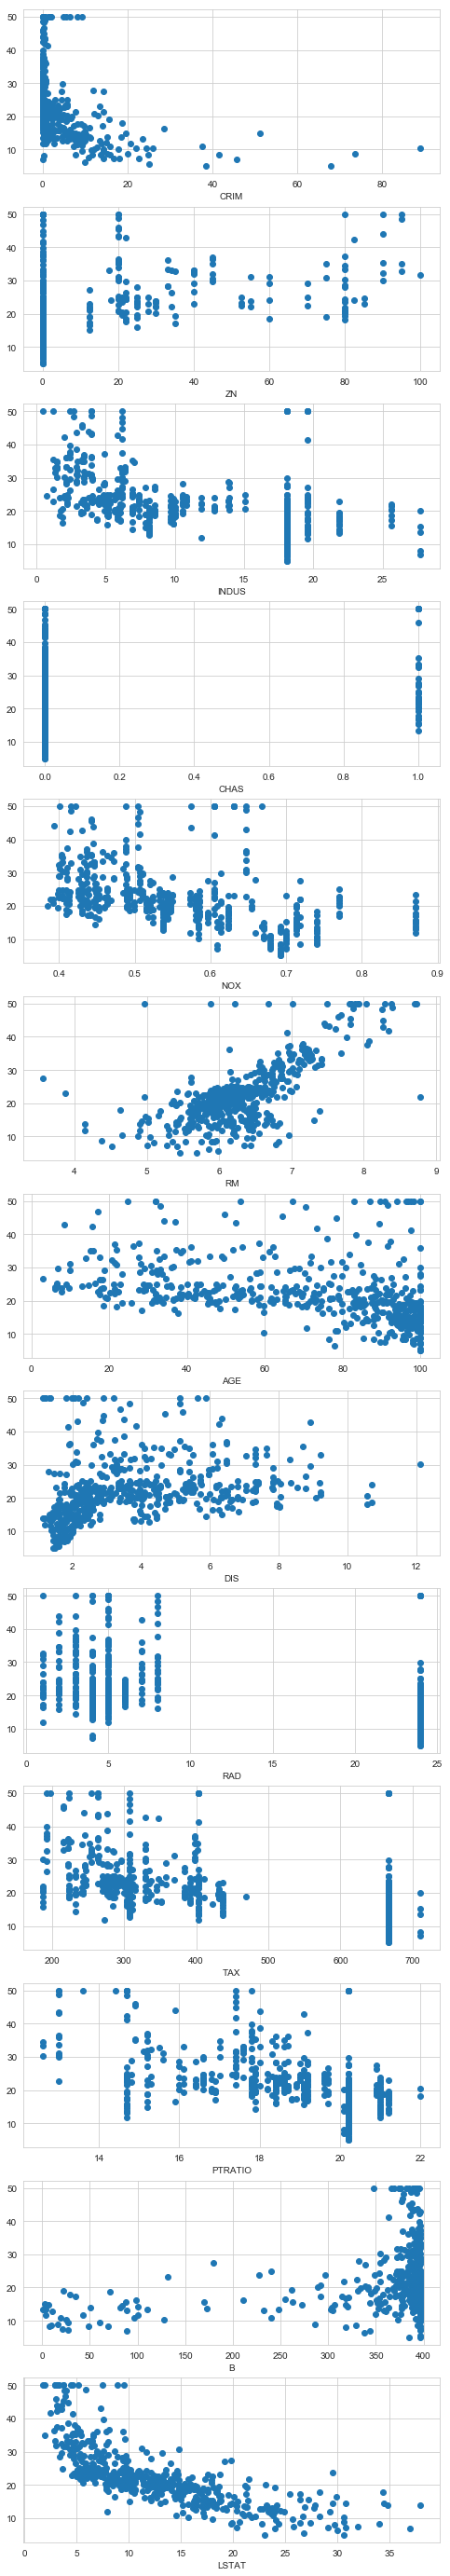

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=13, figsize=(8,50))
#fig.set_figheight =12
#fig.set_figwidth=12
i=0
for column in bos.columns:
    ax[i].scatter(bos[column], target)
    ax[i].set_xlabel(column)
    i += 1

In [11]:
dummy = pd.get_dummies(bos, columns=['RAD'], drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(bos, target, test_size= 0.2)

In [14]:
print(X_train.count())
X_train.head()

CRIM       404
ZN         404
INDUS      404
CHAS       404
NOX        404
RM         404
AGE        404
DIS        404
RAD        404
TAX        404
PTRATIO    404
B          404
LSTAT      404
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
359,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86


In [15]:
print(X_test.count())
X_test.head()

CRIM       102
ZN         102
INDUS      102
CHAS       102
NOX        102
RM         102
AGE        102
DIS        102
RAD        102
TAX        102
PTRATIO    102
B          102
LSTAT      102
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
445,0.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79
475,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_pred = lm.predict(X_test)
y_pred =  np.hstack(y_pred)
y_pred

array([17.21308651, 19.38578612, 13.66529054, 19.50736568, 16.39764595,
       23.79512116, 15.30155859, 28.77316442, 25.34256252, 22.51085761,
       31.43999068, 26.12508499, 23.56239325,  6.42311046, 19.44995972,
       37.77636299, 18.50668576, 20.27533731, 23.72398596, 28.95246354,
       19.48475373, 25.01981289, -4.26809914, 25.31906485, 14.38299977,
       19.78345933, 22.58362957, 14.01309502, 19.62758306,  7.91116792,
       21.39583743, 21.77835971, 35.53645958, 32.4623842 , 19.27724236,
       23.89717381, 36.96509763, 29.08086804, 28.74887775, 17.39799874,
       28.75461599, 20.44652151, 26.49929517, 24.8479912 , 24.34420355,
        7.93193325, 21.82135216, 17.44986806, 21.20980352,  8.33897288,
       32.62839818, 23.73759972, 21.13746687, 28.5844581 , 25.95390992,
       14.8588584 , 32.00522971, 20.88715558, 20.75768759, 29.82471891,
       15.44294846, 11.59785806, 36.39268476, 20.52559209, 28.01447299,
        9.95309364, 18.48573054, 21.30841119, 15.84120338, 17.91

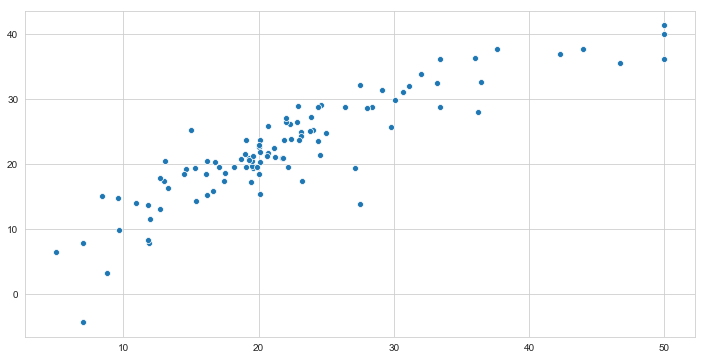

In [20]:
plt.figure(figsize=(12,6))         #y_test and y_pred mapping is almost linear
#plt.scatter(y_test, y_pred)
sns.scatterplot(y_test, y_pred)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


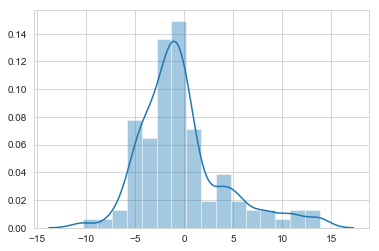

In [21]:
sns.distplot((y_test - y_pred))    #residuals plot is normally distributed

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.1805382412106136
MSE: 18.864020676956187
RMSE: 4.343273037348238


In [24]:
coeffecients = pd.DataFrame(lm.coef_, bos.columns)
coeffecients.columns = ['coeffecients']
coeffecients

,coeffecients
CRIM,-0.120895
ZN,0.050391
INDUS,-0.001671
CHAS,2.657452
NOX,-17.729301
RM,3.930431
AGE,0.001891
DIS,-1.522384
RAD,0.320190
TAX,-0.013397


In [25]:
lm.score(X_train, y_train) #very low score

0.7296327658705362

In [26]:
lm.score(X_test, y_test) #very low score

0.7790189686620479